# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [112]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/My Drive/Project/Hotel_Booking_Clustering.csv')
data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,lead_time,stays_in_weekend_nights,stays_in_week_nights,adr,total_of_special_requests,previous_cancellations,previous_bookings_not_canceled,cancellation_ratio,customer_type_Contract,customer_type_Group,...,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,Cluster
0,0.883976,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1,1.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,0.314879,0.0,0.146169,0.503905,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
3,0.399618,0.0,0.146169,0.503905,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
4,0.410066,0.0,0.237032,0.534668,0.522941,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [113]:
# pilih fitur yang digunakan saat PCA agar relevan
fitur = [
    'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
    'adr', 'total_of_special_requests', 'previous_bookings_not_canceled',
    'cancellation_ratio',
    'customer_type_Contract', 'customer_type_Group',
    'customer_type_Transient', 'customer_type_Transient-Party',
    'market_segment_Aviation', 'market_segment_Complementary',
    'market_segment_Corporate', 'market_segment_Direct',
    'market_segment_Groups', 'market_segment_Offline TA/TO',
    'market_segment_Online TA', 'Cluster'
]

# Memilih hanya kolom yang ada dalam list 'fitur' dari DataFrame
X = data[fitur].drop('Cluster', axis=1)  # Hapus kolom target 'Cluster' dari fitur

# Target variabel (y)
y = data['Cluster']  # Menyimpan 'Cluster' sebagai target variabel

# Membagi dataset menjadi training set dan test set
# 20% data akan digunakan untuk testing dan 80% untuk training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan hasil
print(f"Training Set Size: {len(X_train)}")
print(f"Test Set Size: {len(X_test)}")

Training Set Size: 62148
Test Set Size: 15538


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [114]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [115]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

**Logistic Regression** adalah algoritma klasifikasi yang digunakan untuk memodelkan hubungan antara variabel independen (fitur) dan probabilitas suatu kelas target. Dalam kasus ini, algoritma ini digunakan untuk memprediksi kelas-kelas dalam data berdasarkan fitur yang diberikan.

Pada kode yang digunakan:

* max_iter=1000: Menetapkan jumlah iterasi maksimum untuk proses optimasi. Hal
ini memastikan bahwa model cukup lama untuk menemukan solusi optimal meskipun data besar atau kompleks.
* random_state=42: Digunakan untuk memastikan bahwa hasil yang diperoleh konsisten di setiap run model, dengan menggunakan seed yang sama untuk proses pembagian data dan optimasi.

Logistic Regression mengasumsikan hubungan linear antara fitur dan probabilitas kelas target, yang cocok digunakan pada masalah dengan kelas yang terpisah secara linier.

---
**Random Forest** adalah algoritma ensemble learning yang menggunakan banyak pohon keputusan untuk meningkatkan akurasi dan mengurangi overfitting. Setiap pohon keputusan dilatih pada subset acak dari data pelatihan dan hanya menggunakan subset acak dari fitur yang ada. Prediksi akhir didapatkan dengan voting (untuk klasifikasi) atau averaging (untuk regresi) dari pohon-pohon tersebut.

Pada kode yang digunakan:

* n_estimators=100: Menentukan jumlah pohon yang digunakan dalam Random Forest. Semakin banyak pohon, semakin stabil hasilnya, namun dengan biaya komputasi yang lebih tinggi.
* max_depth=10: Membatasi kedalaman maksimal pohon untuk mencegah overfitting. Pohon yang terlalu dalam cenderung belajar pola yang sangat spesifik pada data latih (overfitting), sehingga membatasi kedalaman dapat membantu meningkatkan generalisasi.
* random_state=42: Sama seperti Logistic Regression, digunakan untuk memastikan bahwa hasilnya konsisten setiap kali model dijalankan.

Random Forest cenderung lebih kuat dalam menangani data yang kompleks dan noisy, karena dapat menangkap hubungan non-linear antar fitur.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [116]:
# Prediksi dengan model Logistic Regression
lr_predictions = lr_model.predict(X_test)

# Prediksi dengan model Decision Tree
rf_predictions = rf_model.predict(X_test)

In [117]:
# Evaluasi Logistic Regression
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions, average='weighted')
lr_precision = precision_score(y_test, lr_predictions, average='weighted')
lr_recall = recall_score(y_test, lr_predictions, average='weighted')

# Evaluasi Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')

# Menampilkan hasil
results = {
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [lr_accuracy, rf_accuracy],
    'Precision': [lr_precision, rf_precision],
    'Recall': [lr_recall, rf_recall],
    'F1-Score': [lr_f1, rf_f1]
}

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,1.0,1.0,1.0,1.0
1,Random Forest,1.0,1.0,1.0,1.0


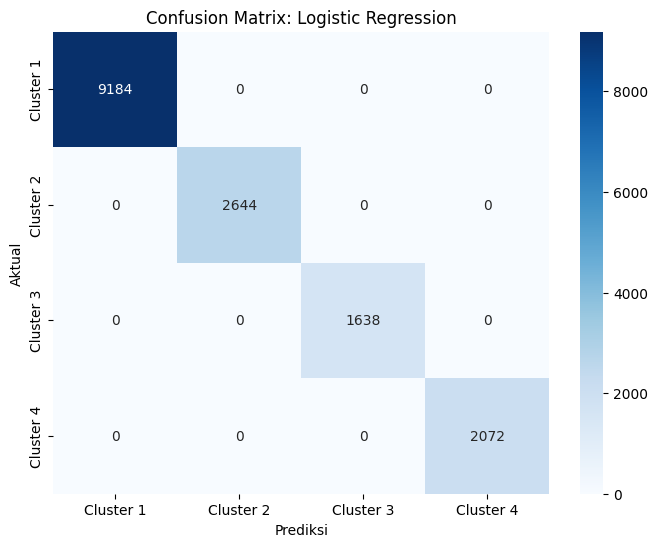

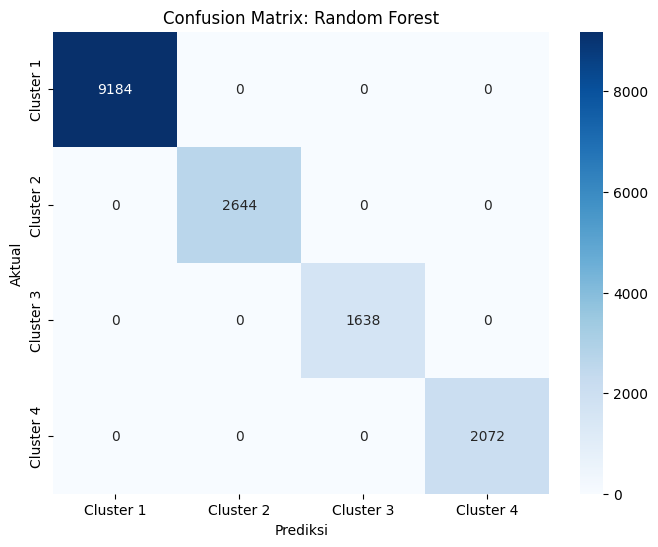

In [124]:
# Confusion Matrix untuk Logistic Regression
lr_cm = confusion_matrix(y_test, lr_predictions)
# Confusion Matrix untuk Random Forest
rf_cm = confusion_matrix(y_test, rf_predictions)

# Visualisasi Confusion Matrix
def plot_confusion_matrix(cm, model_name):
    labels = ["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"]
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.show()

# Plot confusion matrix untuk setiap model
plot_confusion_matrix(lr_cm, 'Logistic Regression')
plot_confusion_matrix(rf_cm, 'Random Forest')

In [119]:
# Logistic Regression
# Evaluasi pada data latih
lr_train_predictions = lr_model.predict(X_train)
lr_train_accuracy = accuracy_score(y_train, lr_train_predictions)
lr_train_f1 = f1_score(y_train, lr_train_predictions, average='weighted')

# Evaluasi pada data uji
lr_test_predictions = lr_model.predict(X_test)
lr_test_accuracy = accuracy_score(y_test, lr_test_predictions)
lr_test_f1 = f1_score(y_test, lr_test_predictions, average='weighted')

# Decision Tree
# Evaluasi pada data latih
rf_train_predictions = rf_model.predict(X_train)
rf_train_accuracy = accuracy_score(y_train, rf_train_predictions)
rf_train_f1 = f1_score(y_train, rf_train_predictions, average='weighted')

# Evaluasi pada data uji
rf_test_predictions = rf_model.predict(X_test)
rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)
rf_test_f1 = f1_score(y_test, rf_test_predictions, average='weighted')

# menampilkan hasil
results = {
    'Model': ['Logistic Regression', 'Random Forest'],
    'Training Accuracy': [lr_train_accuracy, rf_train_accuracy],
    'Training F1-Score': [lr_train_f1, rf_train_f1],
    'Testing Accuracy': [lr_test_accuracy, rf_test_accuracy],
    'Testing F1-Score': [lr_test_f1, rf_test_f1]
}

results_df = pd.DataFrame(results)
results_df

,Model,Training Accuracy,Training F1-Score,Testing Accuracy,Testing F1-Score
0,Logistic Regression,1.0,1.0,1.0,1.0
1,Random Forest,1.0,1.0,1.0,1.0


In [120]:
# Menggunakan cross-validation untuk Logistic Regression
lr_cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores (Logistic Regression) : {lr_cv_scores}")
print(f"Mean Cross-Validation Accuracy (Logistic Regression) : {np.mean(lr_cv_scores):.4f}")

# Cross-validation untuk Random Forest
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print(f"\nCross-Validation Accuracy Scores (Random Forest): {rf_cv_scores}")
print(f"Mean Cross-Validation Accuracy (Random Forest): {np.mean(rf_cv_scores):.4f}")

Cross-Validation Accuracy Scores (Logistic Regression) : [1. 1. 1. 1. 1.]
Mean Cross-Validation Accuracy (Logistic Regression) : 1.0000

Cross-Validation Accuracy Scores (Random Forest): [1. 1. 1. 1. 1.]
Mean Cross-Validation Accuracy (Random Forest): 1.0000


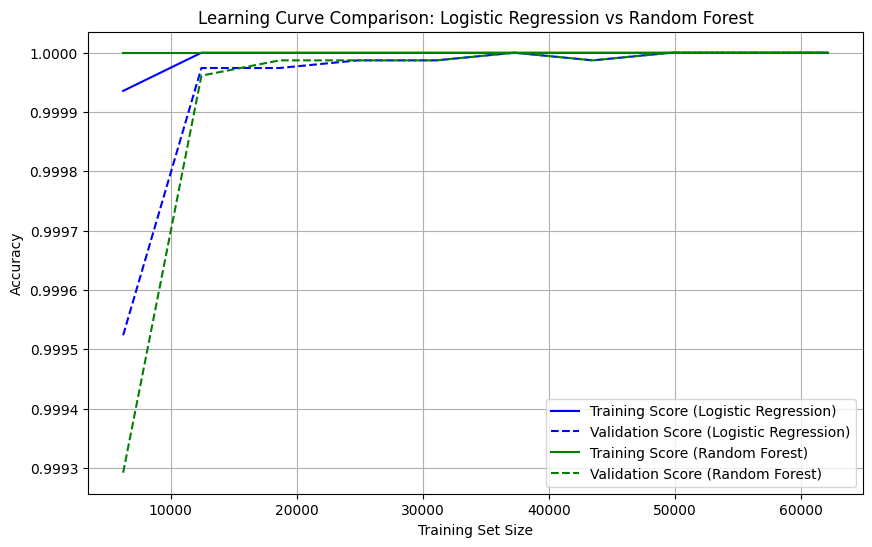

In [125]:
# Logistic Regression Learning Curve
train_sizes_lr, train_scores_lr, test_scores_lr = learning_curve(
    lr_model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Random Forest Learning Curve
train_sizes_rf, train_scores_rf, test_scores_rf = learning_curve(
    rf_model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Menghitung rata-rata skor untuk Logistic Regression
train_mean_lr = np.mean(train_scores_lr, axis=1)
test_mean_lr = np.mean(test_scores_lr, axis=1)

# Menghitung rata-rata skor untuk Random Forest
train_mean_rf = np.mean(train_scores_rf, axis=1)
test_mean_rf = np.mean(test_scores_rf, axis=1)

# Plot learning curve untuk kedua model
plt.figure(figsize=(10, 6))

# Logistic Regression
plt.plot(train_sizes_lr, train_mean_lr, label='Training Score (Logistic Regression)', color='blue')
plt.plot(train_sizes_lr, test_mean_lr, label='Validation Score (Logistic Regression)', color='blue', linestyle='--')

# Random Forest
plt.plot(train_sizes_rf, train_mean_rf, label='Training Score (Random Forest)', color='green')
plt.plot(train_sizes_rf, test_mean_rf, label='Validation Score (Random Forest)', color='green', linestyle='--')

# Menambahkan detail plot
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve Comparison: Logistic Regression vs Random Forest')
plt.legend()
plt.grid()
plt.show()

**Analisis Hasil Evaluasi**
* Logistic Regression dan Random Forest memberikan hasil yang sempurna baik pada data latih maupun data uji dengan akurasi, presisi, recall, dan F-1 score bernilai 1.0
* Cross-Validation untuk kedua model juga menunjukkan hasil yang sempurna, dengan skor 1.0 pada setiap lipatan.
* Dari segi evaluasi, keduanya memiliki performa yang sangat baik dan tidak menunjukkan overfitting, karena Training Accuracy dan Testing Accuracy sama-sama sempurna.
* untuk learning curve logistic Regression sepertinya sangat stabil dan mendekati nilai 1.0 berarti Logistic Regression bekerja sangat baik pada data latih. dan validationnya cenderung stabil dan tidak mengalami penurunan tajam, tetapi sedikit lebih rendah dari Training Score, yang menunjukkan model ini generalize dengan baik namun tidak sepenuhnya sempurna. Sedangkan Random forest juga sangat tinggi dan stabil, mendekati 1.0. Namun, ada penurunan lebih tajam pada Training Score di awal saat ukuran data pelatihan lebih kecil, yang menunjukkan model ini mungkin mempelajari pola lebih kompleks ketika data lebih banyak.dan terlihat bahwa Validation Score pada awalnya cukup rendah, namun meningkat stabil seiring bertambahnya ukuran data pelatihan. berarti Random Forest lebih sensitif terhadap ukuran data latih yang lebih kecil dan menjadi lebih stabil dengan data lebih banyak.

**Analisis Model**
* **Logistic Regression** lebih sederhana dan lebih cepat, tetapi memberikan hasil yang sangat baik pada dataset ini.
* **Random Forest** juga memberikan hasil yang sangat baik, dengan lebih banyak fleksibilitas dan kemampuan menangani pola non-linear, meskipun mungkin lebih lambat atau lebih kompleks dibandingkan dengan Logistic Regression.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [122]:
# Hasil sudah maksimum jadi tidak perlu tuning lagi

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [123]:
# Hasil sudah maksimum jadi tidak perlu tuning lagi

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

**Before Tuning vs After Tuning**

Saya tidak melakukan parameter tuning karena hasil evaluasi saya sudah 1.0 sehhingga tidak dapat menjelaskan perbedaannya, parameter diawal sesuai dengan yang umum dipakai dan untuk random forest saya batasi max_depthnya untuk menghindari overfitting.

**Model Secara Umum:**
* Overfitting atau Underfitting

  Logistic Regression dan Random Forest keduanya memberikan hasil sempurna pada Training dan Testing dengan akurasi, precision, recall, dan F1-Score yang semuanya 1.0. Tidak ada indikasi jelas overfitting atau underfitting berdasarkan hasil tersebut karena model memberikan hasil sempurna di kedua dataset (latih dan uji) serta hasil yang stabil di Learning Curve.

* Precision atau Recall untuk Kelas Tertentu

  Dengan hasil yang sempurna pada semua metrik, tidak terlihat adanya masalah terkait precision atau recall yang rendah untuk kelas tertentu.
  Semua kelas tampaknya diprediksi dengan sempurna tanpa ada bias terhadap kelas mana pun, menunjukkan distribusi data yang seimbang.

**Apakah Model Mengalami Overfitting atau Underfitting?**

Berdasarkan learning curve dan cross-validation, model tidak mengalami overfitting karena kedua model menunjukkan kinerja yang konsisten antara data latih dan uji. Tidak ada perbedaan besar antara Training Score dan Validation Score. Underfitting juga tidak terjadi, karena Accuracy dan F1-Score semuanya sangat tinggi.

**Rekomendasi**
Saya sudah mencoba algoritma lain untuk dataset ini, nilainya tetap sama namun ada perbedaan sedikit di learning ratenya dan mungkin model lain yang belum saya coba ada yang berbeda akurasi, presisi, recall, dan F1-scorenya. jika akurasinya berbeda atau learning curve berbeda cukup lakukan parameter tuning saja. saya rasa sampling tidak perlu dilakukan disini karena tidak ada masalah besar dengan overfitting atau underfitting, pelatihan juga cenderung cepat, dan hasil sudah sangat baik